<a href="https://colab.research.google.com/github/abelmrobledo/challenge_TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diccionario de datos**
*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
*   gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

#📌 Extracción

In [107]:
import requests
import pandas as pd

In [108]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

In [109]:
df = pd.DataFrame(data)

#🔧 Transformación

In [111]:
df_normalizado = pd.json_normalize(data)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#**Duplicados**#

In [164]:
#Verificando si hay duplicados
duplicados = df_normalizado.duplicated()
duplicados.sum()

np.int64(0)

In [114]:
#Nulos
nulos = df_normalizado.isnull().sum()
nulos

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [115]:
#Vacios
vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
vacios


Valores en blanco o string vacios por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [116]:
#Estandarización
df_normalizado['customer.SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)

/tmp/ipython-input-116-1776411023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_normalizado['customer.SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)


In [117]:
#Cambiar númerico account.Charges.Total
df_normalizado['account.Charges.Total']=pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

In [118]:
#Eliminar columnas vacias Churn
df_normalizado=df_normalizado[df_normalizado['Churn'].str.strip() != '']
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [119]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   object 
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

#📊 Carga y análisis

In [120]:
df_normalizado.describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [121]:
#Agregar columna cuentas diarias
df_normalizado['Cuentas_Diarias']=df_normalizado['account.Charges.Monthly']/30

#📄Informe final

#*Introducción*#
Telecom X es una empresa de telecomunicaciones que está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión.
El siguiente análisis se realizó en base a una muestra de datos que pasaron por un proceso de identificación, conversión y estandarización para realizar un análisis predictivo y determinar cuales son las variables de dónde proviene esta evasión de clientes.

#*Limpieza y Tratamiento de Datos*#

*   1.-Se realizó la importación de los datos originalmente en format JSON, esto, através de una URL proporcionada.
*   2.- Se procedio a la normalización de datos, ya que los datos originalmente se encontraban organizados en jerarquias.
*  3.- Se limpiaron los datos a través de la eliminación de filas con datos vacios que no aportaban información para el análisis.
*  4.- Se realizó la conversión de datos a númericos de las columnas correspondientes para facilitar el cálculo de las medidas de tendencia.

#*Análisis Exploratorio de Datos*#

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

##*Porcentaje de evasión de clientes*##

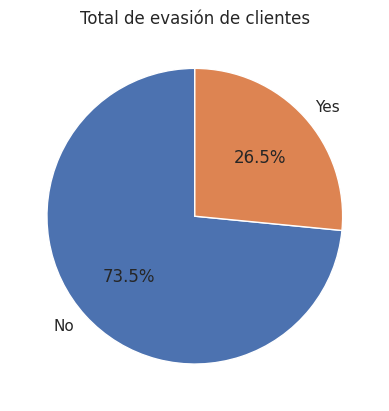

In [123]:
datos_churn=df_normalizado.groupby(['Churn'])['customerID'].count()
plt.pie(datos_churn, labels = datos_churn.index, autopct='%1.1f%%', startangle=90)
plt.title('Total de evasión de clientes')
plt.show()

##*Evasión de clientes por género*##

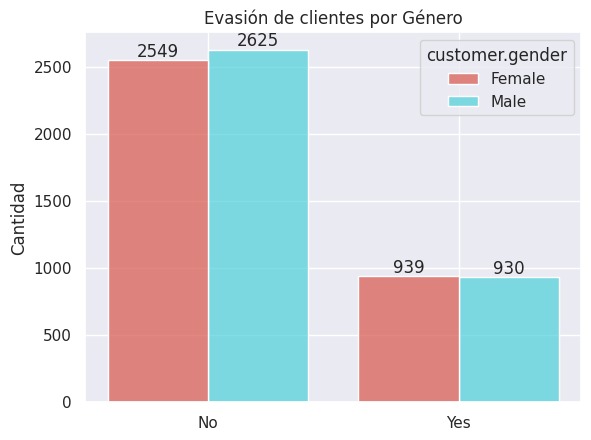

In [124]:

ax=sns.histplot(data=df_normalizado, x="Churn", hue="customer.gender", multiple="dodge", shrink=.8,palette='hls')
ax.set(title='Evasión de clientes por Género')
ax.set_xlabel('')
ax.set_ylabel('Cantidad')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

##*Evasión de clientes por edad*##

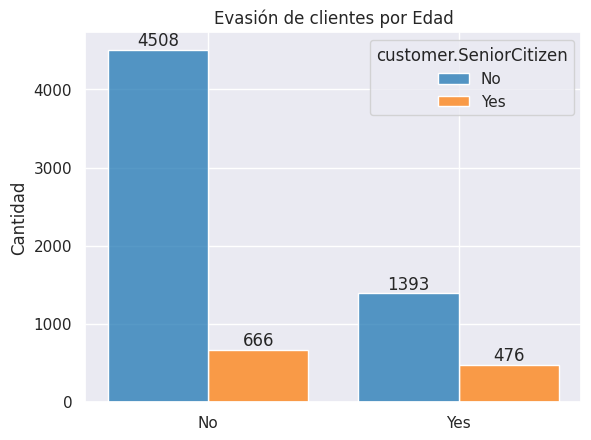

In [125]:
ax=sns.histplot(data=df_normalizado, x="Churn", hue="customer.SeniorCitizen", multiple="dodge", shrink=.8,palette='tab10')
ax.set(title='Evasión de clientes (Personas mayores de 65)')
ax.set_xlabel('')
ax.set_ylabel('Cantidad')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

##*Evasión de clientes por tipo de contrato y tendencia*##

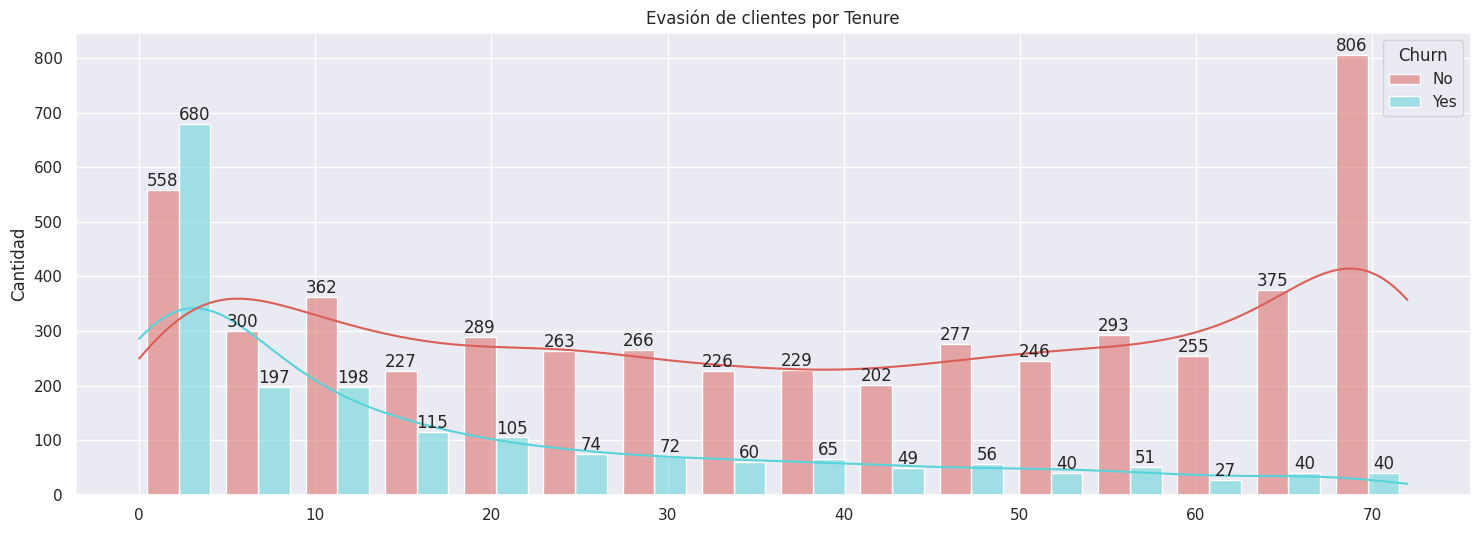

In [162]:
fig = plt.figure(figsize=(18, 6))
ax=sns.histplot(data=df_normalizado, x="customer.tenure", hue="Churn", multiple="dodge", shrink=.8,palette='hls',kde = True)
ax.set_xlabel('')
ax.set_ylabel('Cantidad')
ax.set(title='Evasión de clientes por Tenure')
ax.set_aspect('auto')
for container in ax.containers:
    ax.bar_label(container)
    container
plt.show()

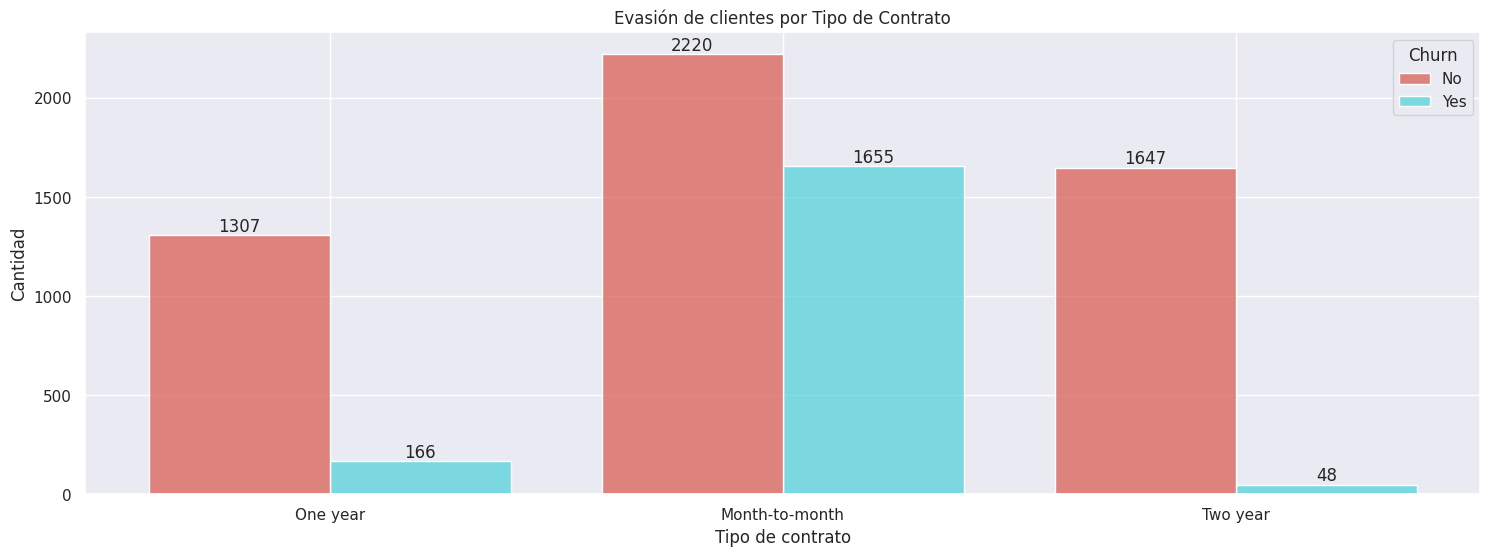

In [163]:
fig = plt.figure(figsize=(18, 6))
ax=sns.histplot(data=df_normalizado, x="account.Contract", hue="Churn", multiple="dodge", shrink=.8,palette='hls')
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('Cantidad')
ax.set(title='Evasión de clientes por Tipo de Contrato')
ax.set_aspect('auto')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

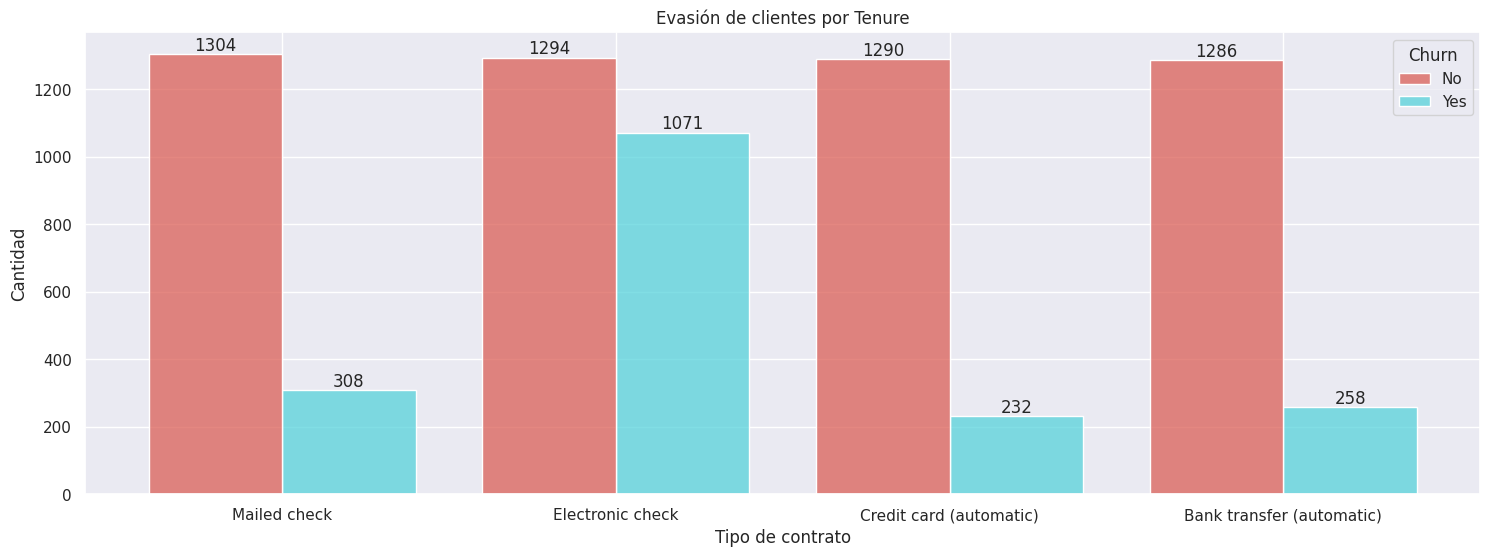

In [129]:
fig = plt.figure(figsize=(18, 6))
ax=sns.histplot(data=df_normalizado, x="account.PaymentMethod", hue="Churn", multiple="dodge", shrink=.8,palette='hls')
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('Cantidad')
ax.set(title='Evasión de clientes por Metodo de pago')
ax.set_aspect('auto')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

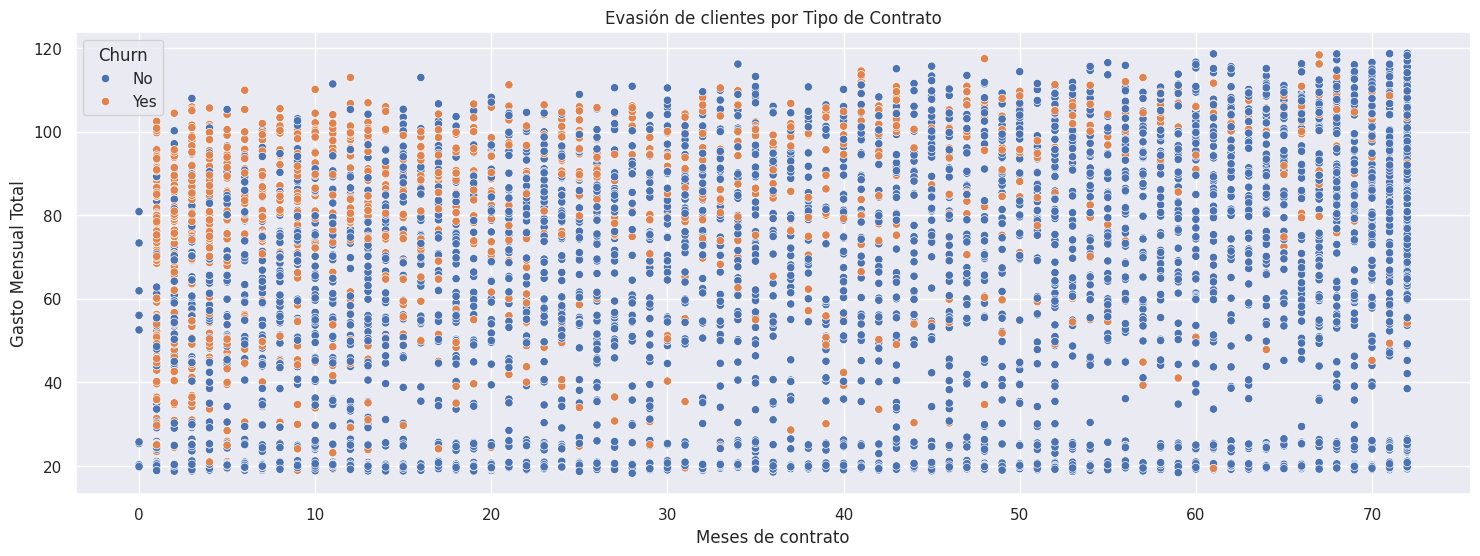

In [154]:
fig = plt.figure(figsize=(18, 6))
ax=sns.scatterplot(data=df_normalizado, x="customer.tenure",y='account.Charges.Monthly', hue="Churn")
ax.set_xlabel('Meses de contrato')
ax.set_ylabel('Gasto Mensual Total')
ax.set(title='Evasión de clientes por Tipo de Contrato')
ax.set_aspect('auto')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#**Conclusiones e Insights**#

Después de realizar el análisis de los datos de TelecomX, se puede determinar lo siguiente:


1.   De la muestra presentada hubo un 73.5% de permanencia de clientes y el restante  26.5% corresponde a la evasión.
2.   No hubo grandes diferencias en cuanto a la evasión por género (H|M).  
3.   Hubo un hallazgo significativo en cuanto a la evasión por meses de contrato. Entre más largo sea su contrato es menos probable que el cliente se vaya.
4.   Se encontró también que el método de pago puede influir, ya que cuando se realizan cobros automáticos es menos probable que el cliente se vaya.





#*Recomendaciones*#
Como recomendación para evitar que los clientes se vayan, deben enfocarse en hacer que los clientes firmen un contrato de permanencia mayores a un año y que el método de pago elegido sea a través de un método automático.